# Obesity Analysis

### Table Of Contents

### [Extraction](#extract)

### [Transform](#transform)

- [Age](#age)

- [Education](#education)

- [Gender](#gender)

- [Income](#income)

- [Ethnicity](#ethnicity)

### [Load](#load)

- [Age Graphs](#graphs-age)

- [Education Graphs](#graphs-education)

- [Gender Graphs](#graphs-gender)

- [Income Graphs](#graphs-income)

- [Ethnicity Graphs](#graphs-ethnic)

### [To Do](#todo)

# Extract

<a id='extract'></a>

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv(r".\data/obesitysurveyUSA.csv")
df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [132]:
list(df.columns)

['YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'Datasource',
 'Class',
 'Topic',
 'Question',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value',
 'Data_Value_Alt',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'Low_Confidence_Limit',
 'High_Confidence_Limit ',
 'Sample_Size',
 'Total',
 'Age(years)',
 'Education',
 'Gender',
 'Income',
 'Race/Ethnicity',
 'GeoLocation',
 'ClassID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'LocationID',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategoryId1',
 'StratificationID1']

In [133]:
print(df['Question'].unique())

['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who engage in no leisure-time physical activity'
 'Percent of adults who report consuming veg

In [134]:
print(df['LocationAbbr'].unique())

['AL' 'US' 'AK' 'AZ' 'AR' 'CA' 'CT' 'CO' 'DE' 'FL' 'DC' 'GA' 'GU' 'HI'
 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO'
 'MT' 'NE' 'NV' 'NH' 'NM' 'NJ' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR'
 'RI' 'SC' 'TN' 'SD' 'TX' 'UT' 'VT' 'VA' 'WV' 'WA' 'WI' 'WY' 'VI']


In [135]:
print(df['YearStart'].unique())

[2011 2012 2014 2013 2015 2016 2017]


In [136]:
MainColumns = ['YearStart',
 'LocationAbbr',
#  'LocationDesc',
 'Question',
 'Data_Value',
 'Sample_Size',
 'Total',
]

DisinctColumns = ['Age(years)',
 'Education',
 'Gender',
 'Income',
 'Race/Ethnicity',
]

AgeDF = df[MainColumns]
EducationDF = df[MainColumns]
GenderDF = df[MainColumns]
IncomeDF = df[MainColumns]
EthnicityDF = df[MainColumns]

# ListOfDF = [AgeDF, EducationDF, GenderDF, IncomeDF, EducationDF]

# for DF in ListOfDF:
#     DF = df[MainColumns]
    # print(DF)

AgeDF['Age(years)'] = df['Age(years)']
EducationDF['Education'] = df['Education']
GenderDF['Gender'] = df['Gender']
IncomeDF['Income'] = df['Income']
EthnicityDF['Race/Ethnicity'] = df['Race/Ethnicity']

# ToDo:
# Find way to put above cell in loop
# Find way to clear warnings below

C:\Users\nrovr\AppData\Local\Temp\ipykernel_5468\1382438640.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AgeDF['Age(years)'] = df['Age(years)']
C:\Users\nrovr\AppData\Local\Temp\ipykernel_5468\1382438640.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EducationDF['Education'] = df['Education']
C:\Users\nrovr\AppData\Local\Temp\ipykernel_5468\1382438640.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

# Age Database

<a id='age'></a>

In [137]:
AgeDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Age(years)
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [138]:
AgeDF = AgeDF[AgeDF['Total'].notna() | AgeDF['Age(years)'].notna()]
AgeDF['Age(years)'] = AgeDF['Total'].combine_first(AgeDF['Age(years)'])
AgeDF = AgeDF.drop('Total', axis=1)
AgeDF.head(7)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Age(years)
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total
7,2011,AL,Percent of adults aged 18 years and older who ...,16.3,356.0,18 - 24
8,2011,AL,Percent of adults aged 18 years and older who ...,35.2,598.0,25 - 34
9,2011,AL,Percent of adults aged 18 years and older who ...,35.5,865.0,35 - 44
10,2011,AL,Percent of adults aged 18 years and older who ...,38.0,1288.0,45 - 54
11,2011,AL,Percent of adults aged 18 years and older who ...,36.4,1676.0,55 - 64
12,2011,AL,Percent of adults aged 18 years and older who ...,27.1,2521.0,65 or older


# Education Dataset

<a id='education'></a>

In [139]:
EducationDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Education
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,Less than high school
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,High school graduate


In [140]:
EducationDF = EducationDF[EducationDF['Total'].notna() | EducationDF['Education'].notna()]
EducationDF['Education'] = EducationDF['Total'].combine_first(EducationDF['Education'])
EducationDF = EducationDF.drop('Total', axis=1)
EducationDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Education
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,Less than high school
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,High school graduate
5,2011,AL,Percent of adults aged 18 years and older who ...,33.8,1925.0,Some college or technical school
6,2011,AL,Percent of adults aged 18 years and older who ...,26.4,1812.0,College graduate


# Gender Dataset

<a id='gender'></a>

In [141]:
GenderDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Gender
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,Male
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,Female
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [142]:
GenderDF = GenderDF[GenderDF['Total'].notna() | GenderDF['Gender'].notna()]
GenderDF['Gender'] = GenderDF['Total'].combine_first(GenderDF['Gender'])
GenderDF = GenderDF.drop('Total', axis=1)
GenderDF.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Gender
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,Male
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,Female
28,2011,AL,Percent of adults aged 18 years and older who ...,34.7,7304.0,Total
29,2011,AL,Percent of adults aged 18 years and older who ...,39.0,2581.0,Male
30,2011,AL,Percent of adults aged 18 years and older who ...,30.5,4723.0,Female
57,2011,AL,Percent of adults who achieve at least 150 min...,42.4,7191.0,Total
58,2011,AL,Percent of adults who achieve at least 150 min...,45.4,2441.0,Male
59,2011,AL,Percent of adults who achieve at least 150 min...,39.6,4750.0,Female
87,2011,AL,Percent of adults who achieve at least 150 min...,15.0,7145.0,Total


# Income Dataset

<a id='income'></a>

In [143]:
IncomeDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Income
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [144]:
IncomeDF = IncomeDF[IncomeDF['Total'].notna() | IncomeDF['Income'].notna()]
IncomeDF['Income'] = IncomeDF['Total'].combine_first(IncomeDF['Income'])
IncomeDF = IncomeDF.drop('Total', axis=1)
IncomeDF.head(8)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Income
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total
13,2011,AL,Percent of adults aged 18 years and older who ...,38.5,1112.0,"Less than $15,000"
14,2011,AL,Percent of adults aged 18 years and older who ...,34.8,1367.0,"$15,000 - $24,999"
15,2011,AL,Percent of adults aged 18 years and older who ...,35.8,757.0,"$25,000 - $34,999"
16,2011,AL,Percent of adults aged 18 years and older who ...,32.3,861.0,"$35,000 - $49,999"
17,2011,AL,Percent of adults aged 18 years and older who ...,34.1,785.0,"$50,000 - $74,999"
18,2011,AL,Percent of adults aged 18 years and older who ...,28.8,1125.0,"$75,000 or greater"
19,2011,AL,Percent of adults aged 18 years and older who ...,23.8,1297.0,Data not reported


# Ethnicity Dataset

<a id='ethnicity'></a>

In [145]:
EthnicityDF.head(5)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Total,Race/Ethnicity
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN
1,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN
3,2011,AL,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN
4,2011,AL,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN


In [146]:
EthnicityDF = EthnicityDF[EthnicityDF['Total'].notna() | EthnicityDF['Race/Ethnicity'].notna()]
EthnicityDF['Race/Ethnicity'] = EthnicityDF['Total'].combine_first(EthnicityDF['Race/Ethnicity'])
EthnicityDF = EthnicityDF.drop('Total', axis=1)
EthnicityDF = EthnicityDF[EthnicityDF['Data_Value'].notna()]
EthnicityDF.head(9)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity
0,2011,AL,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total
20,2011,AL,Percent of adults aged 18 years and older who ...,29.8,5042.0,Non-Hispanic White
21,2011,AL,Percent of adults aged 18 years and older who ...,40.1,1878.0,Non-Hispanic Black
22,2011,AL,Percent of adults aged 18 years and older who ...,28.6,115.0,Hispanic
25,2011,AL,Percent of adults aged 18 years and older who ...,32.9,61.0,American Indian/Alaska Native
26,2011,AL,Percent of adults aged 18 years and older who ...,27.8,58.0,2 or more races
28,2011,AL,Percent of adults aged 18 years and older who ...,34.7,7304.0,Total
48,2011,AL,Percent of adults aged 18 years and older who ...,36.4,5042.0,Non-Hispanic White
49,2011,AL,Percent of adults aged 18 years and older who ...,30.1,1878.0,Non-Hispanic Black


# Graphs

<a id='graphs'></a>

### Possible Graph Breakdowns To Consider

- Years: 2011 to 2017
- Num of Questions: 9
- Num of Age Categories: 6
- Num of Education Categories: 4
- Genders: 2
- Num of Income Categories: 7* (One Category is named 'Data not reported')
- Num of Ethnicity Categories: 8* (Some values are NaN due to low amounts of input)

### List Of Questions

- 'Percent of adults aged 18 years and older who have obesity'
- 'Percent of adults aged 18 years and older who have an overweight classification'
- 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
- 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
- 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
- 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
- 'Percent of adults who engage in no leisure-time physical activity'
- 'Percent of adults who report consuming vegetables less than one time daily'
- 'Percent of adults who report consuming fruit less than one time daily'

In [147]:
# This cell allows you to take an indepth look at the data within the obesity survey dataset

Year = 2012
Location = 'NY'
Question = 'Percent of adults aged 18 years and older who have obesity'

## Age Graph

<a id='graphs-age'></a>

In [148]:
AgeDF_Anaylsis = AgeDF

AgeDF_Anaylsis = AgeDF_Anaylsis[AgeDF_Anaylsis["YearStart"] == Year]
AgeDF_Anaylsis = AgeDF_Anaylsis[AgeDF_Anaylsis["LocationAbbr"] == Location]
AgeDF_Anaylsis = AgeDF_Anaylsis[AgeDF_Anaylsis["Question"] == Question]

AgeDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Age(years)
18765,2012,NY,Percent of adults aged 18 years and older who ...,23.6,5700.0,Total
18771,2012,NY,Percent of adults aged 18 years and older who ...,12.7,403.0,18 - 24
18772,2012,NY,Percent of adults aged 18 years and older who ...,19.5,690.0,25 - 34
18773,2012,NY,Percent of adults aged 18 years and older who ...,25.7,751.0,35 - 44
18774,2012,NY,Percent of adults aged 18 years and older who ...,26.6,1049.0,45 - 54
18775,2012,NY,Percent of adults aged 18 years and older who ...,28.7,1092.0,55 - 64
18776,2012,NY,Percent of adults aged 18 years and older who ...,25.7,1648.0,65 or older


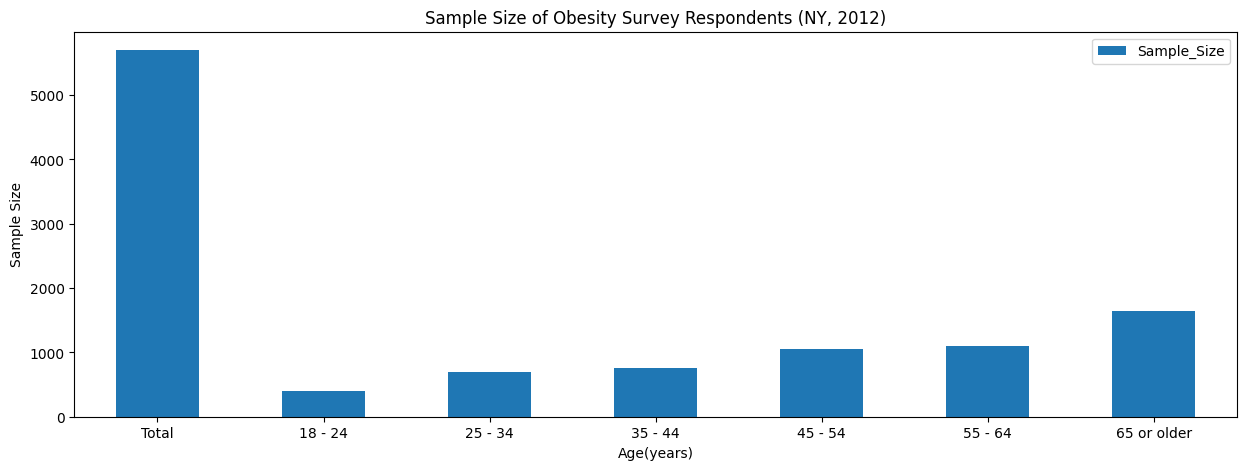

In [149]:
plot = AgeDF_Anaylsis.plot(x="Age(years)", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Sample Size");

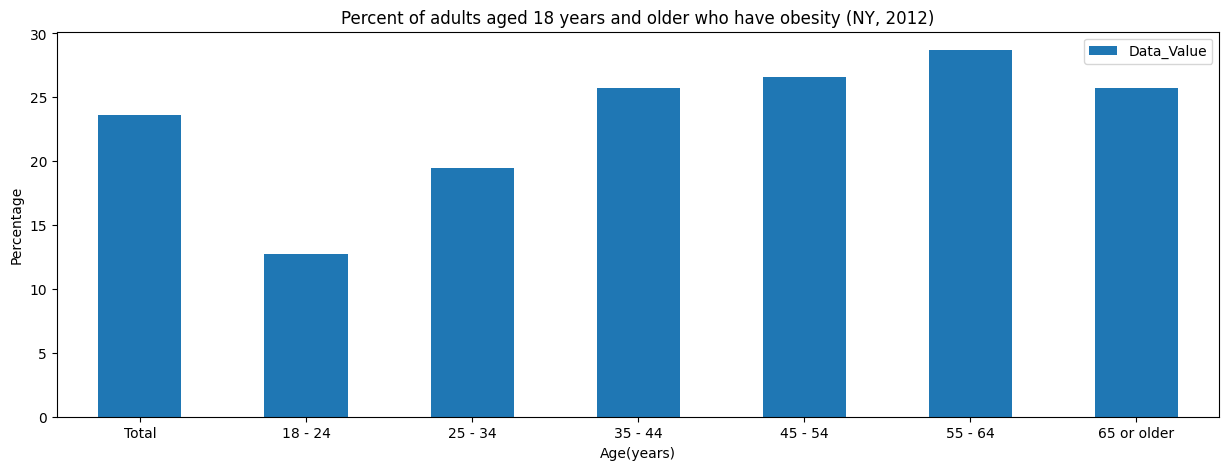

In [150]:
plot = AgeDF_Anaylsis.plot(x="Age(years)", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"{Question} ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Percentage");

## Education

<a id='graphs-education'></a>

In [151]:
EducationDF_Anaylsis = EducationDF

EducationDF_Anaylsis = EducationDF_Anaylsis[EducationDF_Anaylsis["YearStart"] == Year]
EducationDF_Anaylsis = EducationDF_Anaylsis[EducationDF_Anaylsis["LocationAbbr"] == Location]
EducationDF_Anaylsis = EducationDF_Anaylsis[EducationDF_Anaylsis["Question"] == Question]

EducationDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Education
18765,2012,NY,Percent of adults aged 18 years and older who ...,23.6,5700.0,Total
18767,2012,NY,Percent of adults aged 18 years and older who ...,33.0,467.0,Less than high school
18768,2012,NY,Percent of adults aged 18 years and older who ...,23.0,1511.0,High school graduate
18769,2012,NY,Percent of adults aged 18 years and older who ...,25.4,1377.0,Some college or technical school
18770,2012,NY,Percent of adults aged 18 years and older who ...,18.0,2329.0,College graduate


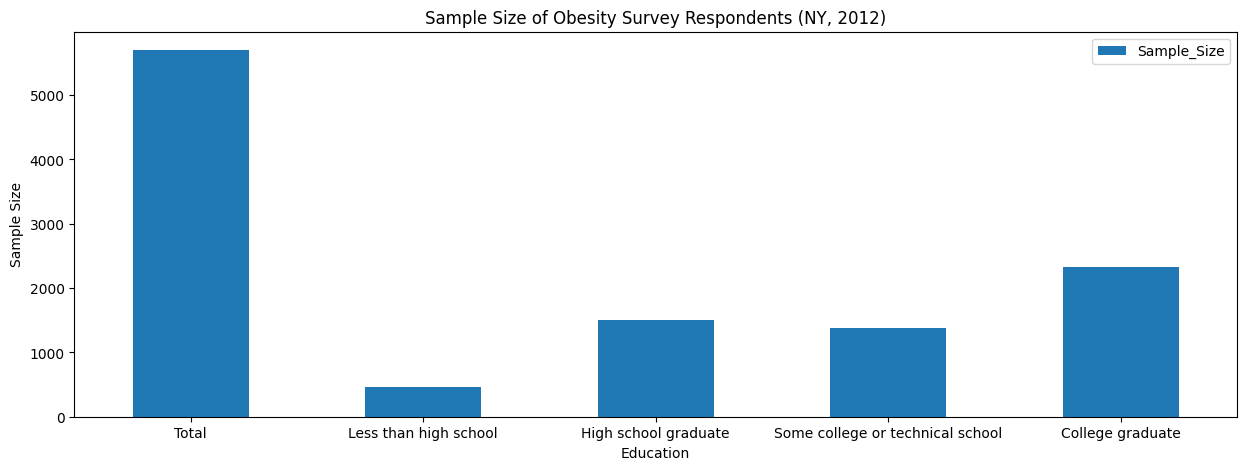

In [152]:
plot = EducationDF_Anaylsis.plot(x="Education", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Sample Size");

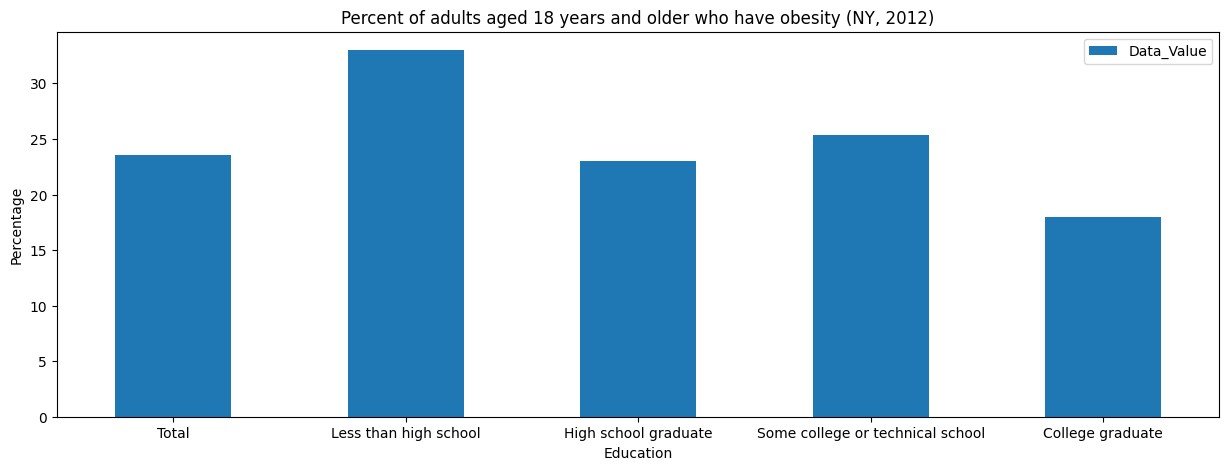

In [153]:
plot = EducationDF_Anaylsis.plot(x="Education", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"{Question} ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Percentage");

# Gender Graphs

<a id='graphs-gender'></a>

In [154]:
GenderDF_Anaylsis = GenderDF

GenderDF_Anaylsis = GenderDF_Anaylsis[GenderDF_Anaylsis["YearStart"] == Year]
GenderDF_Anaylsis = GenderDF_Anaylsis[GenderDF_Anaylsis["LocationAbbr"] == Location]
GenderDF_Anaylsis = GenderDF_Anaylsis[GenderDF_Anaylsis["Question"] == Question]

GenderDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Gender
18584,2012,NY,Percent of adults aged 18 years and older who ...,22.9,3298.0,Female
18765,2012,NY,Percent of adults aged 18 years and older who ...,23.6,5700.0,Total
18766,2012,NY,Percent of adults aged 18 years and older who ...,24.3,2402.0,Male


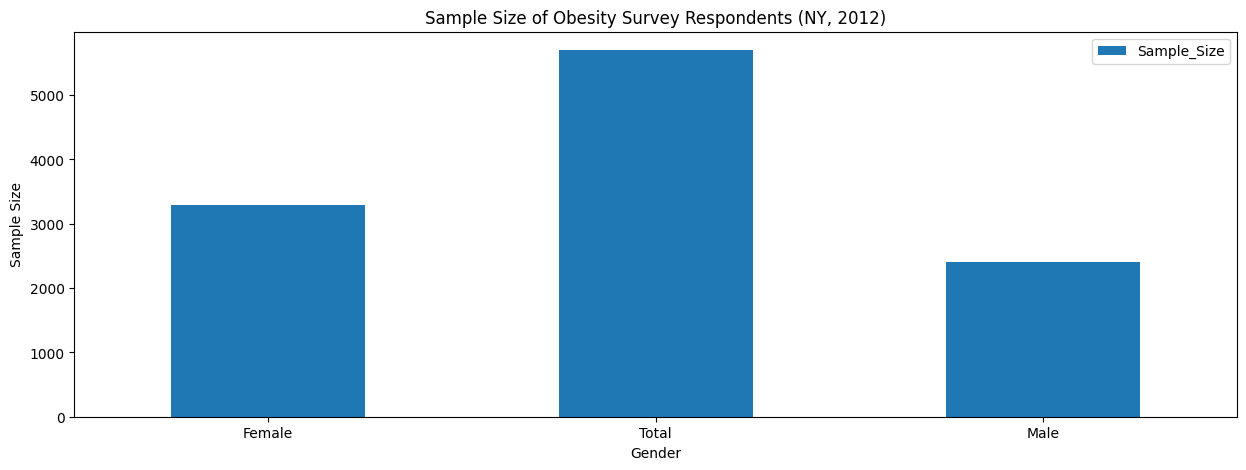

In [155]:
plot = GenderDF_Anaylsis.plot(x="Gender", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Sample Size");

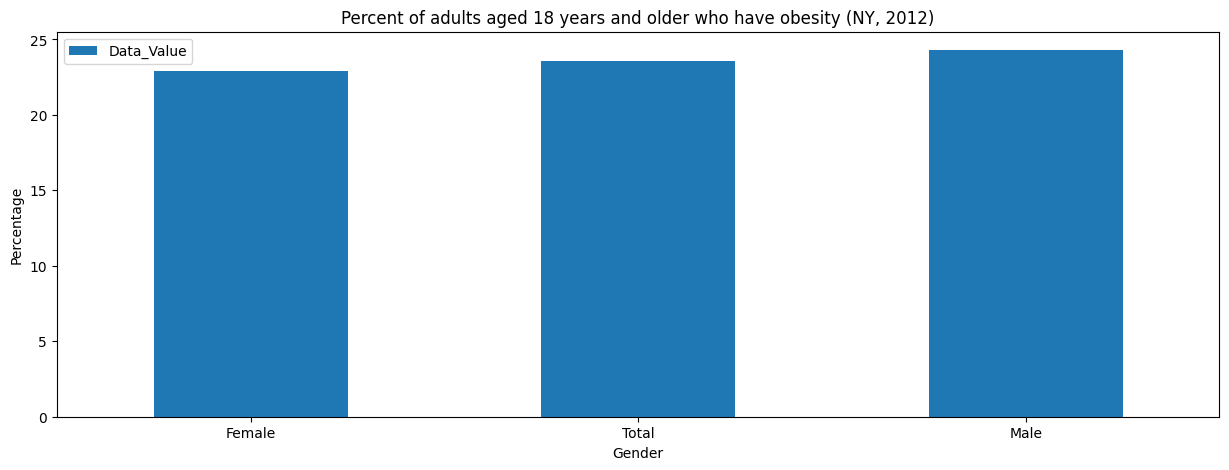

In [156]:
plot = GenderDF_Anaylsis.plot(x="Gender", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"{Question} ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Percentage");

# Income Graphs

<a id='graphs-income'></a>

In [157]:
IncomeDF_Anaylsis = IncomeDF

IncomeDF_Anaylsis = IncomeDF_Anaylsis[IncomeDF_Anaylsis["YearStart"] == Year]
IncomeDF_Anaylsis = IncomeDF_Anaylsis[IncomeDF_Anaylsis["LocationAbbr"] == Location]
IncomeDF_Anaylsis = IncomeDF_Anaylsis[IncomeDF_Anaylsis["Question"] == Question]

IncomeDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Income
18765,2012,NY,Percent of adults aged 18 years and older who ...,23.6,5700.0,Total
18777,2012,NY,Percent of adults aged 18 years and older who ...,32.2,592.0,"Less than $15,000"
18778,2012,NY,Percent of adults aged 18 years and older who ...,24.7,839.0,"$15,000 - $24,999"
18779,2012,NY,Percent of adults aged 18 years and older who ...,24.0,501.0,"$25,000 - $34,999"
18780,2012,NY,Percent of adults aged 18 years and older who ...,23.2,680.0,"$35,000 - $49,999"
18781,2012,NY,Percent of adults aged 18 years and older who ...,22.6,762.0,"$50,000 - $74,999"
18782,2012,NY,Percent of adults aged 18 years and older who ...,22.2,1591.0,"$75,000 or greater"
18783,2012,NY,Percent of adults aged 18 years and older who ...,19.5,735.0,Data not reported


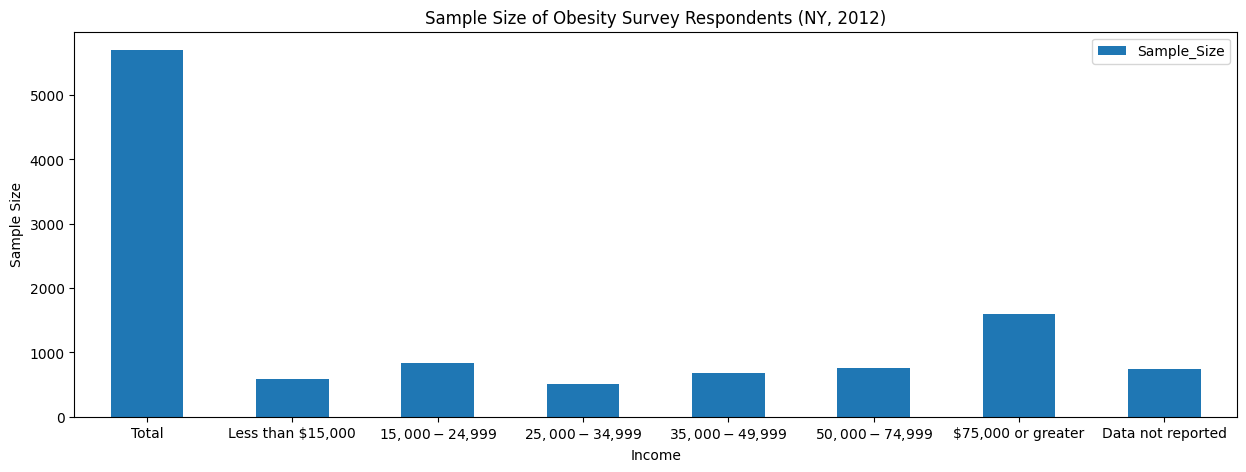

In [158]:
plot = IncomeDF_Anaylsis.plot(x="Income", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Sample Size");

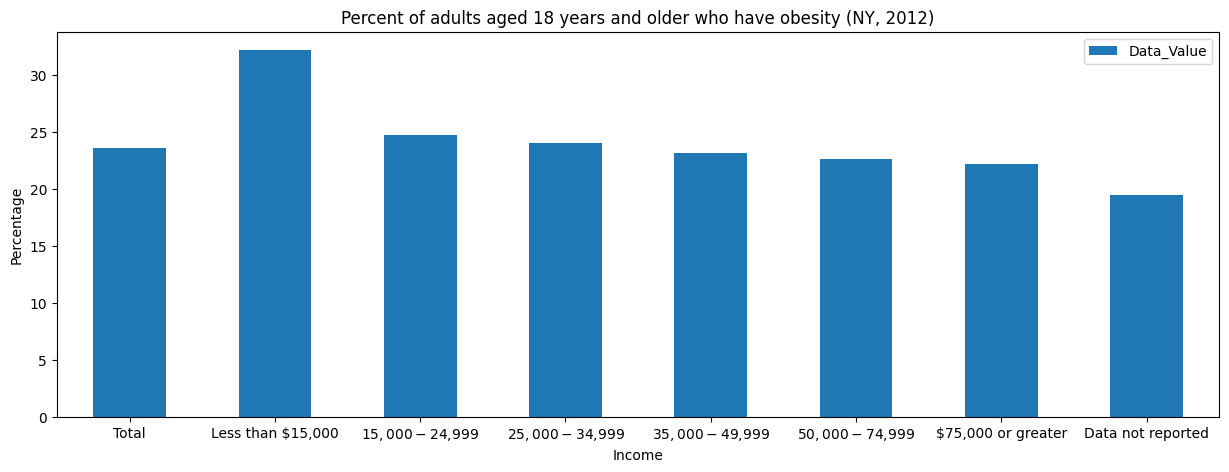

In [159]:
plot = IncomeDF_Anaylsis.plot(x="Income", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"{Question} ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Percentage");

# Ethnicity Graphs

<a id='graphs-ethnic'></a>

In [160]:
EthnicityDF_Anaylsis = EthnicityDF

EthnicityDF_Anaylsis = EthnicityDF_Anaylsis[EthnicityDF_Anaylsis["YearStart"] == Year]
EthnicityDF_Anaylsis = EthnicityDF_Anaylsis[EthnicityDF_Anaylsis["LocationAbbr"] == Location]
EthnicityDF_Anaylsis = EthnicityDF_Anaylsis[EthnicityDF_Anaylsis["Question"] == Question]

EthnicityDF_Anaylsis.head(10)

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity
18765,2012,NY,Percent of adults aged 18 years and older who ...,23.6,5700.0,Total
18784,2012,NY,Percent of adults aged 18 years and older who ...,23.2,4140.0,Non-Hispanic White
18785,2012,NY,Percent of adults aged 18 years and older who ...,31.5,498.0,Non-Hispanic Black
18786,2012,NY,Percent of adults aged 18 years and older who ...,25.1,607.0,Hispanic
18787,2012,NY,Percent of adults aged 18 years and older who ...,7.8,196.0,Asian
18790,2012,NY,Percent of adults aged 18 years and older who ...,36.3,78.0,2 or more races


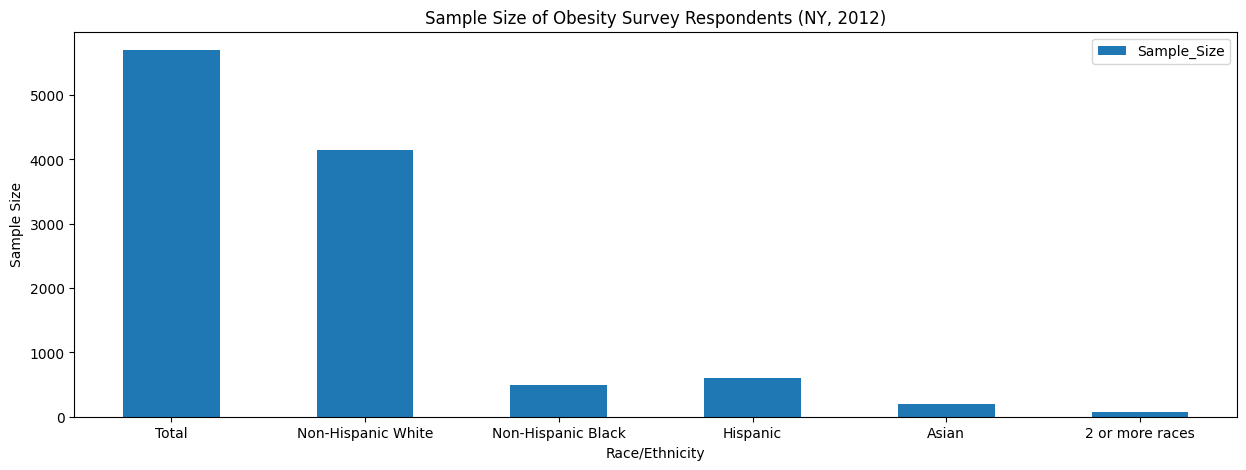

In [161]:
plot = EthnicityDF_Anaylsis.plot(x="Race/Ethnicity", y=["Sample_Size"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"Sample Size of Obesity Survey Respondents ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Sample Size");

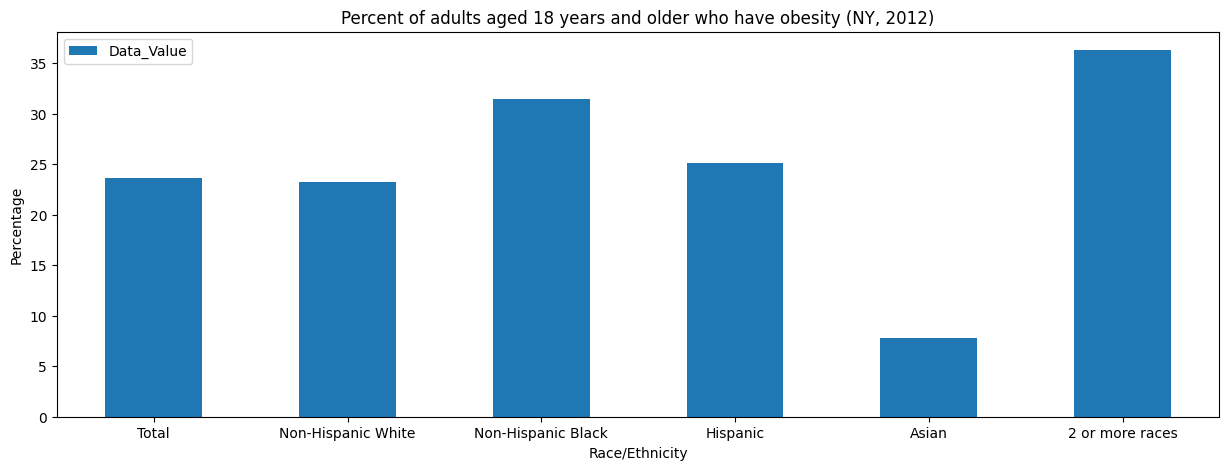

In [162]:
plot = EthnicityDF_Anaylsis.plot(x="Race/Ethnicity", y=["Data_Value"], kind="bar", rot=0, figsize=(15, 5))
plot.set_title(f"{Question} ({Location}, {Year})")
# plot.set_xlabel("Size of Firm (Employees)")
plot.set_ylabel("Percentage");

# To Do

<a id='todo'></a>

- Rename columns
- Consider removing total column from graphs (Looks good on sample size graphs but bad in percentage graphs)
- Refactor analysis datasets to include all year data
- Graph multiple years next to each other
- Remove NaN races from ethnic dataset
- Combine food_table1 to income and age datasets
- Graph results
- Find way to clear the warnings while creating datasets
- Find way to loop dataset creation
- Consider looking up which state has the highest amount of obesity